# Algotytm przecinania się odcinków na płaszczyźnie

In [3]:
import dill
dill.load_session('notebook_env.db')

In [4]:
import matplotlib.pyplot as plt
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [5]:
def draw_example_1():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = [(-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5)]
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

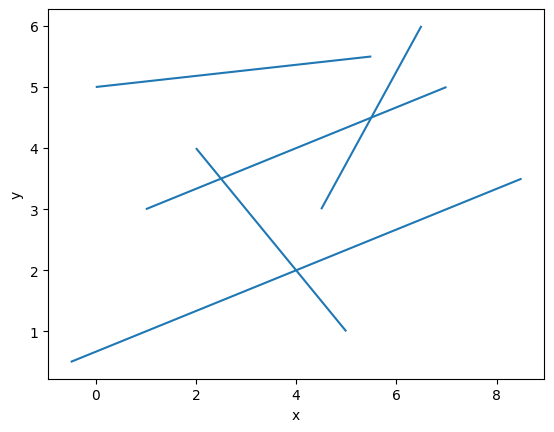

In [6]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

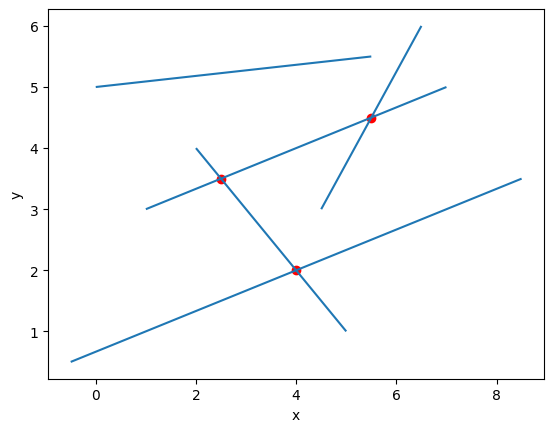

In [7]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [8]:
from random import uniform
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    epsilon=10**(-12)
    points=[]
    counter=0
    while counter<n:
        x1,y1=uniform(0,max_x),uniform(0,max_y)
        x2,y2=uniform(0,max_x),uniform(0,max_y)
        if abs(x1-x2)>epsilon:
            point=sorted(((x1,y1),(x2,y2)),key=lambda x:x[0])
            points.append(point)
            counter+=1
    # print(points)
    return points

In [9]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.040s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [10]:
section = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

In [11]:
def draw_segments(segments):
    data=[]
    for tup in segments:
        data.append(tup[0])
        data.append(tup[1])
    print(data)
    vis=Visualizer()
    vis.add_line_segment(data)
    vis.show()

[(242.72188838861942, 538.5431155250159), (558.2079769708686, 294.4920078416895), (116.51914587773915, 530.6958321971472), (154.2611374274373, 261.11890106965416), (74.983926509255, 611.1799064933767), (581.5579725180218, 339.84407731541967), (400.48677778787066, 588.6378677280375), (484.0662667932785, 543.0277032611733), (35.612347543789724, 742.5478885891268), (342.2996212217696, 772.6589461703593), (820.7877696608517, 507.8776865051804), (873.35750394276, 836.1918332328868), (322.8773323708288, 791.2247622143789), (651.4184984908751, 577.9080489212491), (601.8294689676205, 716.3265021004091), (828.8946923931016, 154.4940302565332), (182.40576307768907, 663.0039033855704), (482.31026230526084, 529.5723222380647), (30.24060348402069, 2.8923739190291897), (96.44468501446856, 139.80148488943956), (391.70798074057376, 723.9263684849823), (700.429707580001, 74.12645200336476), (550.2057524739315, 285.245159195361), (705.3996356423175, 360.5569187917498), (767.6081081751053, 998.5344526582

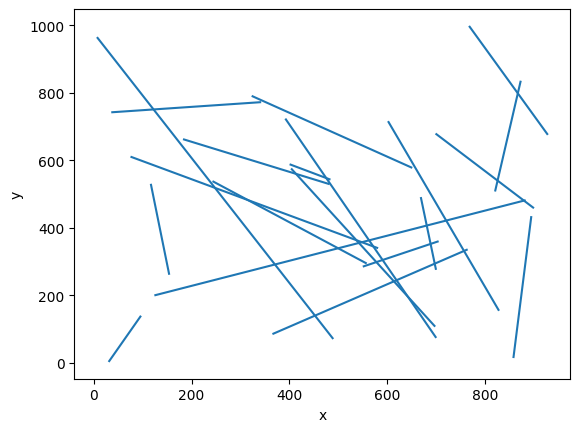

In [12]:
draw_segments(section)

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [13]:
test_segments=[]

In [14]:
%matplotlib tk
from matplotlib.backend_bases import MouseButton
from matplotlib.collections import LineCollection
from copy import deepcopy
# TO SAVE YOUR SET SIMPLY EXIT THE PLOT WINDOW
print("TO SAVE YOUR SET SIMPLY EXIT THE PLOT WINDOW")
x=[]
y=[]
tmp=[] # stores points added, when len(tmp)==2 adds a segment to the plot and then clears itself
segments=LineCollection([])
segments_to_save=[]
fig, ax = plt.subplots()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.scatter(x,y)

def on_click(event):
    global x,y,tmp,segments_to_save,segments
    if event.button is MouseButton.LEFT and event.inaxes:
        new_vertex=(event.xdata,event.ydata)
        x.append(new_vertex[0])
        y.append(new_vertex[1])
        tmp.append(new_vertex)
        if len(tmp)==2:
            if tmp[0][0]!=tmp[1][0]:
                segments_to_save.append(deepcopy(tmp))
                segments.set_segments(segments.get_segments()+[tmp])
            else:
                x.pop()
                x.pop()
                y.pop()
                y.pop()
            tmp.clear()
        ax.clear()
        ax.set_xlim(0,100)
        ax.set_ylim(0,100)
        ax.scatter(x,y)
        ax.add_collection(segments)
        plt.show()


plt.connect("button_press_event", on_click)

plt.show()

TO SAVE YOUR SET SIMPLY EXIT THE PLOT WINDOW


In [15]:
%matplotlib inline
test_segments.append(segments_to_save)

Funkcje i klasy pomocnicze

In [16]:
from queue import PriorityQueue
from sortedcontainers import SortedSet
from enum import Enum

In [17]:
class Event(Enum):
        SEGMENT_START=1
        SEGMENT_END=2
        SEGMENT_CROSS=3

class Segment():
    def __init__(self,p,q,index):
        self.p=p
        self.q=q
        self.a = (p[1] - q[1]) / (p[0] - q[0])
        self.b = q[1] - self.a * q[0]
        self.index=index


In [18]:
def det(a :float,b :float,c :float):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - a[1]*b[0] - a[0]*c[1]

def orientation(a :float,b :float,c :float,epsilon :float):
    d=det(a,b,c)
    if abs(d)<=epsilon:
        return 0
    elif d>0:
        return 1
    else:
        return -1

def do_intersect(seg1 :Segment,seg2: Segment):
    epsilon=10**(-12)
    o1 = orientation(seg2.p,seg2.q,seg1.p,epsilon)
    o2 = orientation(seg2.p,seg2.q,seg1.q,epsilon)
    o3 = orientation(seg1.p,seg1.q,seg2.p,epsilon)
    o4 = orientation(seg1.p,seg1.q,seg2.q,epsilon)

    return (o1 != o2 and o3 != o4) or (o1==0 and o2!=0) or (o2==0 and o1!=0) or (o3==0 and o4!=0) or (o4==0 and o3!=0)

In [19]:
def intersection_point(line1,line2): 
        x=(line1.b-line2.b)/(line2.a-line1.a)
        y=line1.a*x+line1.b
        return x,y

Uzupełnij funkcję ```is_intersection```

In [20]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """

    Q=PriorityQueue()
    # add all points to Q
    # in Q we store (x, segment, event type)
    for i in range(len(sections)):
        segment=sections[i]
        p,q=segment[0],segment[1]
        obj=Segment(p,q,i)
        Q.put((p[0],p[1],obj,Event.SEGMENT_START))
        Q.put((q[0],q[1],obj,Event.SEGMENT_END))

    T=SortedSet()

    while not Q.empty():
        x,y,segment,event=Q.get()
        # print(x)
        # update T where segment is the segment class
        T1=SortedSet(key=lambda segment: segment.a*x+segment.b)
        T1.update(T)
        T=T1

        if event is Event.SEGMENT_START:
            T.add(segment)
            index=T.index(segment)
            if index-1>=0 and do_intersect(segment,T[index-1]):
                return True
            if index+1<len(T) and do_intersect(segment,T[index+1]):
                return True
        elif event is Event.SEGMENT_END:
            index=T.index(segment)
            if index-1>=0 and index+1<len(T) and do_intersect(T[index+1],T[index-1]):
                return True
            T.remove(segment)

    return False

In [21]:
is_intersection(section)

True

In [22]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.003s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [44]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    
    Q=PriorityQueue()
    # add all points to Q
    # in Q we store (x, segment, event type)
    for i in range(len(sections)):
        segment=sections[i]
        p,q=segment[0],segment[1]
        obj=Segment(p,q,i)
        Q.put((p[0],p[1],obj,Event.SEGMENT_START))
        Q.put((q[0],q[1],obj,Event.SEGMENT_END))

    T=SortedSet()

    # preprocessing for visualisations
    data=[]
    for tup in sections:
        data.append(tup[0])
        data.append(tup[1])
    vis=Visualizer()
    vis.add_line_segment(data)
    vis.add_point(data,color="green")

    while not Q.empty():
        x,y,segment,event=Q.get()
        # sweep visualisation
        current_point=vis.add_point((x,y),color='red')
        current_sweep=vis.add_line(((x,y),(x,0)),color='red')
        # print(current,segment.p,segment.q,event)
        # update T where segment is the segment class
        T1=SortedSet(key=lambda segment: segment.a*x+segment.b)
        T1.update(T)
        T=T1

        if event is Event.SEGMENT_START:
            T.add(segment)
            index=T.index(segment)
            if index-1>=0 and do_intersect(segment,T[index-1]):
                vis.add_point(intersection_point(segment,T[index-1]),color="purple")
                return True,vis
            if index+1<len(T) and do_intersect(segment,T[index+1]):
                vis.add_point(intersection_point(segment,T[index+1]),color="purple")
                return True,vis
        elif event is Event.SEGMENT_END:
            index=T.index(segment)
            if index-1>=0 and index+1<len(T) and do_intersect(T[index+1],T[index-1]):
                vis.add_point(intersection_point(T[index-1],T[index+1]),color='purple')
                return True,vis
            T.remove(segment)
        vis.remove_figure(current_sweep)
        vis.remove_figure(current_point)
    return False,vis

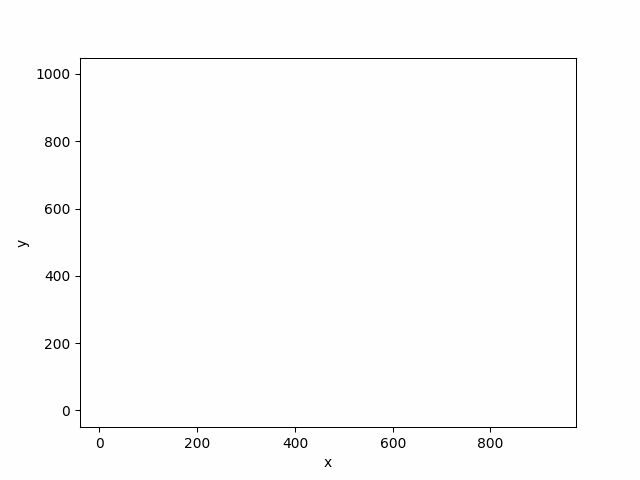

In [45]:
res,vis=is_intersection_with_visualization(section)
vis.show_gif(interval=500)

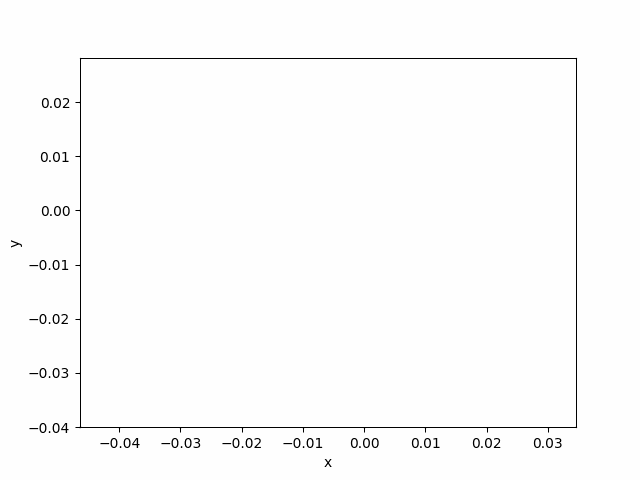

In [46]:
res,vis=is_intersection_with_visualization(Test.read_points(3,2))
vis.show_gif(interval=500)

Uzupełnij funkcję ```find_intersections```

In [25]:
def add_intersection_if_not_exists(intersections :set, Q :PriorityQueue, segment1 :Segment, segment2 :Segment):
     if (segment1,segment2) not in intersections and (segment2, segment1) not in intersections:
          intersections.add((segment1,segment2))
          point=intersection_point(segment1,segment2)
          Q.put((point[0],point[1],segment1,segment2,Event.SEGMENT_CROSS)) 

In [26]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

    Q=PriorityQueue()
    # add all points to Q
    # in Q we store (x, y, segment1, segment2, event type)
    for i in range(len(sections)):
        segment1=sections[i]
        p,q=segment1[0],segment1[1]
        # testowe sortowanie na wszelki wypadek
        if p[0]>q[0]:
            p,q=q,p
            
        obj=Segment(p,q,i+1)
        Q.put((p[0],p[1],obj,None, Event.SEGMENT_START))
        Q.put((q[0],q[1],obj,None, Event.SEGMENT_END))

    T=SortedSet(key=lambda segment1: segment1.a*x+segment1.b)
    # intersections contains (Segment1,Segment2), where there is an intersection between these segments. 
    # intersection points will be calculated later on
    intersections=set()
    while not Q.empty():
        x,_,segment1,segment2,event=Q.get()

        # update T where segment1 is the segment1 class
        T1=SortedSet(key=lambda segment1: segment1.a*x+segment1.b)
        T1.update(T)
        T=T1

        if event is Event.SEGMENT_START:
            T.add(segment1)
            index=T.index(segment1)
            if index-1>=0 and do_intersect(segment1,T[index-1]):
                add_intersection_if_not_exists(intersections,Q,segment1,T[index-1])

            if index+1<len(T) and do_intersect(segment1,T[index+1]):
                add_intersection_if_not_exists(intersections,Q,segment1,T[index+1])
        ###
        elif event is Event.SEGMENT_END:
            index=T.index(segment1)
            if index-1>=0 and index+1<len(T) and do_intersect(T[index+1],T[index-1]):
                add_intersection_if_not_exists(intersections,Q,T[index+1],T[index-1])
            T.remove(segment1)
        ###
        elif event is Event.SEGMENT_CROSS:
            # odcinki automatycznie zamienia sie przy aktualizowaniu wartosci przez T1
            # index1<index2
            
            # O(klogk)
            T1=SortedSet(key=lambda segment1: segment1.a*(x+10**(-12))+segment1.b)
            T1.update(T)
            T=T1
            
            index1=T.index(segment1)
            index2=T.index(segment2)

            if index1>index2:
                index1,index2=index2,index1
                segment1,segment2=segment2,segment1

            # check intersections between index2 and segment2
            if index2+1<len(T) and do_intersect(segment2,T[index2+1]):
                add_intersection_if_not_exists(intersections,Q,segment2,T[index2+1])

            # check intersections between index1 and segment1
            if index1-1>=0 and do_intersect(segment1,T[index1-1]):
                add_intersection_if_not_exists(intersections,Q,segment1,T[index1-1])


    # result
    res=[]
    for (segment1,segment2) in intersections:
        point=intersection_point(segment1,segment2)
        res.append((point,segment1.index,segment2.index))

    return res

In [27]:
def find_intersections_lista(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

    Q=PriorityQueue()
    # add all points to Q
    # in Q we store (x, y, segment1, segment2, event type)
    for i in range(len(sections)):
        segment=sections[i]
        p,q=segment[0],segment[1]
        obj=Segment(p,q,i+1)
        Q.put((p[0],p[1],obj,None, Event.SEGMENT_START))
        Q.put((q[0],q[1],obj,None, Event.SEGMENT_END))

    T=[]
    # intersections contains (Segment1,Segment2), where there is an intersection between these segments. 
    # intersection points will be calculated later on
    intersections=set()
    while not Q.empty():
        x,y,segment,segment2,event=Q.get()

        # print(current,segment.p,segment.q,event)
        # update T where segment is the segment class
        if event!=Event.SEGMENT_CROSS:
            T.sort(key=lambda segment: segment.a*x+segment.b)

        if event is Event.SEGMENT_START:
            T.append(segment)
            T.sort(key=lambda segment: segment.a*x+segment.b)
            index=T.index(segment)
            if index-1>=0 and do_intersect(segment,T[index-1]):
                add_intersection_if_not_exists(intersections,Q,segment,T[index-1])

            if index+1<len(T) and do_intersect(segment,T[index+1]):
                add_intersection_if_not_exists(intersections,Q,segment,T[index+1])

        elif event is Event.SEGMENT_END:
            index=T.index(segment)
            if index-1>=0 and index+1<len(T) and do_intersect(T[index+1],T[index-1]):
                add_intersection_if_not_exists(intersections,Q,T[index+1],T[index-1])

            T.remove(segment)
        ###
        elif event is Event.SEGMENT_CROSS:
            # index1<index2
            
            # O(n)
            index1=T.index(segment)
            index2=T.index(segment2)

            if index1>index2:
                index1,index2=index2,index1
                segment,segment2=segment2,segment

            # segment1,segment2=segment2,segment1
            T[index1],T[index2]=T[index2],T[index1]
            
            # check intersections between index2 and segment
            if index2+1<len(T) and do_intersect(T[index2],T[index2+1]):
                # print(f"checking {T[index2].index} and {T[index2+1].index}")
                add_intersection_if_not_exists(intersections,Q,T[index2],T[index2+1])

            # check intersections between index1 and segment2
            if index1-1>=0 and do_intersect(T[index1],T[index1-1]):
                # print(f"checking {T[index1].index} and {T[index1-1].index}")
                add_intersection_if_not_exists(intersections,Q,T[index1],T[index1-1])


    # result
    res=[]
    for (segment1,segment2) in intersections:
        point=intersection_point(segment1,segment2)
        res.append((point,segment1.index,segment2.index))

    return res

In [28]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: WRONG ANSWER
		Output:   [((0.022344451130778698, 0.017111754849194583), 4, 2), ((0.022658670631229855, -0.026817363547212647), 4, 1), ((0.011526074740254208, 0.006132801296422352), 3, 2), ((-0.0016743790516658098, -0.007263586832941074), 2, 1), ((0.011860591253227505, -0.01814014322949553), 3, 1)]
		Expected: ['-0.0016743790516658117 -0.007263586832941072 1 2', '0.011526074740254208 0.006132801296422439 2 3', '0.011860591253227505 -0.018140143229495424 1 3', '0.022344451130778698 0.01711175484919488 2 4', '0.022658670631229855 -0.026817363547212168 1 4']
	Test 2: Passed
	Test 3: Passed
Result: 2/3
Time: 0.003s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [29]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

    Q=PriorityQueue()
    # add all points to Q
    # in Q we store (x, y, segment1, segment2, event type)
    for i in range(len(sections)):
        segment1=sections[i]
        p,q=segment1[0],segment1[1]
        obj=Segment(p,q,i+1)
        Q.put((p[0],p[1],obj,None, Event.SEGMENT_START))
        Q.put((q[0],q[1],obj,None, Event.SEGMENT_END))

    # preprocessing for visualisations
    data=[]
    for tup in sections:
        data.append(tup[0])
        data.append(tup[1])
    vis=Visualizer()
    vis.add_line_segment(data)
    vis.add_point(data,color="green")


    T=SortedSet(key=lambda segment1: segment1.a*x+segment1.b)
    # intersections contains (Segment1,Segment2), where there is an intersection between these segments. 
    # intersection points will be calculated later on
    intersections=set()
    while not Q.empty():
        x,y,segment1,segment2,event=Q.get()

        # sweep visualisation
        current_point=vis.add_point((x,y),color='red')
        current_sweep=vis.add_line(((x,y),(x,0)),color='red')

        # update T where segment1 is the segment1 class
        if event != Event.SEGMENT_CROSS:
            T1=SortedSet(key=lambda segment1: segment1.a*x+segment1.b)
            T1.update(T)
            T=T1     

        if event is Event.SEGMENT_START:
            T.add(segment1)
            index=T.index(segment1)
            if index-1>=0 and do_intersect(segment1,T[index-1]):
                add_intersection_if_not_exists(intersections,Q,segment1,T[index-1])
                point=intersection_point(segment1,T[index-1])
                vis.add_point(point,color='purple')

            if index+1<len(T) and do_intersect(segment1,T[index+1]):
                add_intersection_if_not_exists(intersections,Q,segment1,T[index+1])
                point=intersection_point(segment1,T[index+1])
                vis.add_point(point,color='purple')

        elif event is Event.SEGMENT_END:
            index=T.index(segment1)
            if index-1>=0 and index+1<len(T) and do_intersect(T[index+1],T[index-1]):
                add_intersection_if_not_exists(intersections,Q,T[index+1],T[index-1])
                point=intersection_point(T[index+1],T[index-1])
                vis.add_point(point,color='purple')
            T.remove(segment1)
        ###
        elif event is Event.SEGMENT_CROSS:
            # odcinki automatycznie zamienia sie przy aktualizowaniu wartosci przez T1
            # index1<index2

            T1=SortedSet(key=lambda segment1: segment1.a*(x+10**(-12))+segment1.b)
            T1.update(T)
            T=T1

            index1=T.index(segment1)
            index2=T.index(segment2)

            if index1>index2:
                index1,index2=index2,index1
                segment1,segment2=segment2,segment1
                
            # check intersections between index2 and segment1
            if index2+1<len(T) and do_intersect(segment2,T[index2+1]):
                add_intersection_if_not_exists(intersections,Q,segment2,T[index2+1])
                point=intersection_point(segment2,T[index2+1])
                vis.add_point(point,color='purple')
            # check intersections between index1 and segment2
            if index1-1>=0 and do_intersect(segment1,T[index1-1]):
                add_intersection_if_not_exists(intersections,Q,segment1,T[index1-1])
                point=intersection_point(segment1,T[index1-1])
                vis.add_point(point,color='purple')
        ###        
        vis.remove_figure(current_sweep)
        vis.remove_figure(current_point)

    # result
    res=[]
    for (segment1,segment2) in intersections:
        point=intersection_point(segment1,segment2)
        res.append((point,segment1.index,segment2.index))

    return res,vis

In [30]:
def find_intersections_with_visualization_lista(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

    Q=PriorityQueue()
    # add all points to Q
    # in Q we store (x, y, segment1, segment2, event type)
    for i in range(len(sections)):
        segment=sections[i]
        p,q=segment[0],segment[1]
        obj=Segment(p,q,i)
        Q.put((p[0],p[1],obj,None, Event.SEGMENT_START))
        Q.put((q[0],q[1],obj,None, Event.SEGMENT_END))

    # preprocessing for visualisations
    data=[]
    for tup in sections:
        data.append(tup[0])
        data.append(tup[1])
    vis=Visualizer()
    vis.add_line_segment(data)
    vis.add_point(data,color="green")


    T=[]
    # intersections contains (Segment1,Segment2), where there is an intersection between these segments. 
    # intersection points will be calculated later on
    intersections=set()
    while not Q.empty():
        x,y,segment,segment2,event=Q.get()

        # sweep visualisation
        current_point=vis.add_point((x,y),color='red')
        current_sweep=vis.add_line(((x,y),(x,0)),color='red')

        # update T where segment is the segment class
        if event!=Event.SEGMENT_CROSS:
            T.sort(key=lambda segment: segment.a*x+segment.b)


        if event is Event.SEGMENT_START:
            T.append(segment)
            T.sort(key=lambda segment: segment.a*x+segment.b)
            index=T.index(segment)
            if index-1>=0 and do_intersect(segment,T[index-1]):
                add_intersection_if_not_exists(intersections,Q,segment,T[index-1])
                point=intersection_point(segment,T[index-1])
                vis.add_point(point,color='orange')
            if index+1<len(T) and do_intersect(segment,T[index+1]):
                add_intersection_if_not_exists(intersections,Q,segment,T[index+1])
                point=intersection_point(segment,T[index+1])
                vis.add_point(point,color='orange')
        elif event is Event.SEGMENT_END:
            index=T.index(segment)
            if index-1>=0 and index+1<len(T) and do_intersect(T[index+1],T[index-1]):
                add_intersection_if_not_exists(intersections,Q,T[index+1],T[index-1])
                point=intersection_point(T[index+1],T[index-1])
                vis.add_point(point,color='orange')
            T.remove(segment)
        ###
        elif event is Event.SEGMENT_CROSS:
            # odcinki automatycznie zamienia sie przy aktualizowaniu wartosci przez T1
            # index1<index2
            index1=T.index(segment)
            index2=T.index(segment2)
    
            if index1>index2:
                index1,index2=index2,index1
                segment,segment2=segment2,segment

            for i,el in enumerate(T):
                print(f"at {i} line nr {el.index}")
                
            T[index1],T[index2]=T[index2],T[index1]
            
            # print(f"EVENT CROSS BETWEEN {segment.index},index:{index1} AND {segment2.index},index:{index2} | {len(T)}")
            # print(f"index1:{index1-1>=0}  index2:{index2+1<len(T)}")
            # check intersections between index2 and segment
            if index2+1<len(T) and do_intersect(T[index2],T[index2+1]):
                print(f"checking {T[index2].index} and {T[index2+1].index}")
                add_intersection_if_not_exists(intersections,Q,T[index2],T[index2+1])
                point=intersection_point(T[index2],T[index2+1])
                vis.add_point(point,color='orange')
            
            # check intersections between index1 and segment2
            if index1-1>=0 and do_intersect(T[index1],T[index1-1]):
                print(f"checking {T[index1].index} and {T[index1-1].index}")
                add_intersection_if_not_exists(intersections,Q,T[index1],T[index1-1])
                point=intersection_point(T[index1],T[index1-1])
                vis.add_point(point,color='orange')
        ###
        vis.remove_figure(current_sweep)
        vis.remove_figure(current_point)

    # result
    res=[]
    for (segment1,segment2) in intersections:
        point=intersection_point(segment1,segment2)
        res.append((point,segment1.index,segment2.index))

    return res,vis

Wizualizacja zbiorów testowych

In [31]:
def draw_intersections(result,segments):
    data=[]
    for tup in segments:
        data.append(tup[0])
        data.append(tup[1])
    print(data)
    vis=Visualizer()
    vis.add_line_segment(data)

    vis.add_point([point for point,_,_ in result],color='red')
    vis.show()


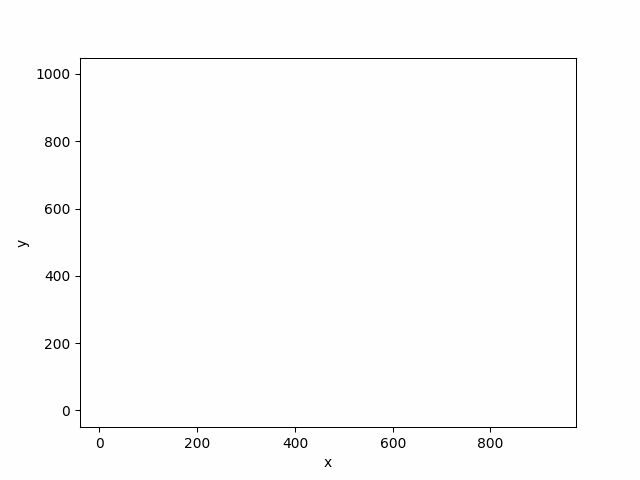

In [32]:
%matplotlib inline
_,vis=find_intersections_with_visualization(section)
vis.show_gif(interval=10)

[(242.72188838861942, 538.5431155250159), (558.2079769708686, 294.4920078416895), (116.51914587773915, 530.6958321971472), (154.2611374274373, 261.11890106965416), (74.983926509255, 611.1799064933767), (581.5579725180218, 339.84407731541967), (400.48677778787066, 588.6378677280375), (484.0662667932785, 543.0277032611733), (35.612347543789724, 742.5478885891268), (342.2996212217696, 772.6589461703593), (820.7877696608517, 507.8776865051804), (873.35750394276, 836.1918332328868), (322.8773323708288, 791.2247622143789), (651.4184984908751, 577.9080489212491), (601.8294689676205, 716.3265021004091), (828.8946923931016, 154.4940302565332), (182.40576307768907, 663.0039033855704), (482.31026230526084, 529.5723222380647), (30.24060348402069, 2.8923739190291897), (96.44468501446856, 139.80148488943956), (391.70798074057376, 723.9263684849823), (700.429707580001, 74.12645200336476), (550.2057524739315, 285.245159195361), (705.3996356423175, 360.5569187917498), (767.6081081751053, 998.5344526582

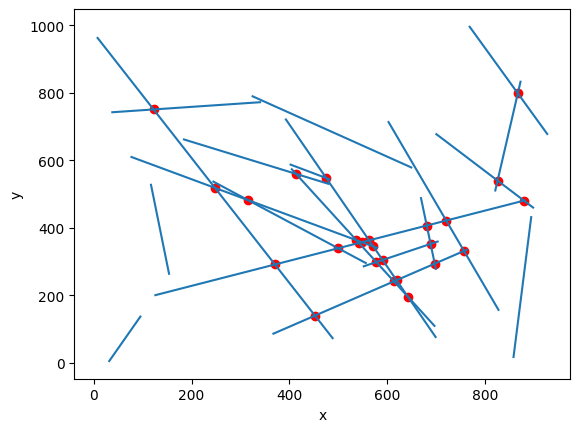

In [33]:
draw_intersections(find_intersections(section),section)

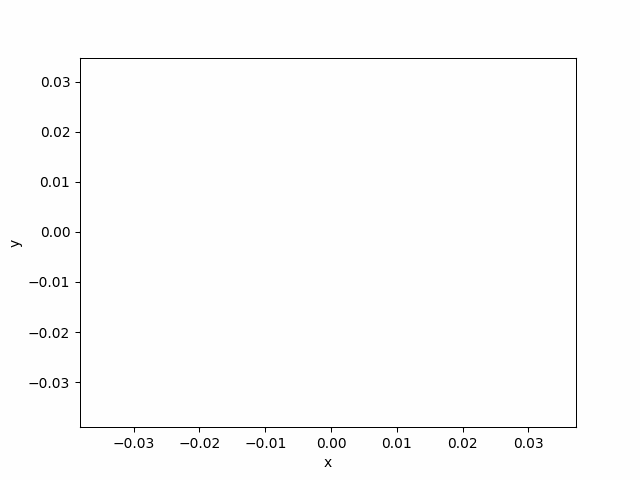

In [34]:
_,vis=find_intersections_with_visualization(Test.read_points(3,1))
vis.show_gif()

[(-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825), (-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402), (0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674), (0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138), (-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019)]


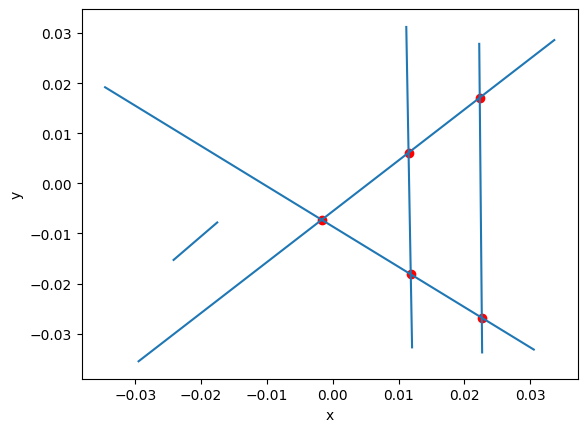

In [35]:
draw_intersections(find_intersections(Test.read_points(3,1)),Test.read_points(3,1))

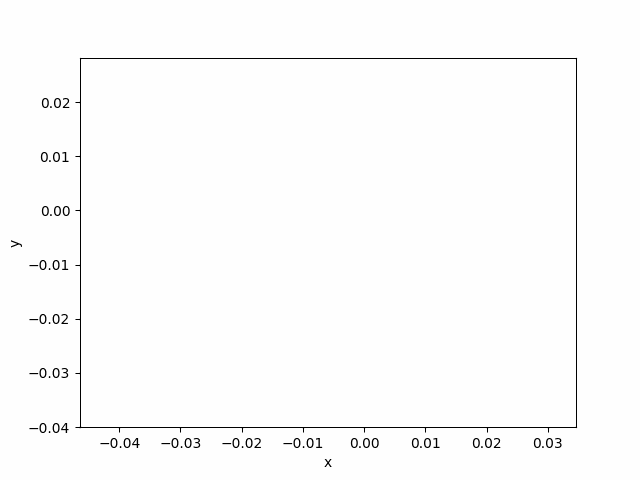

In [36]:
_,vis=find_intersections_with_visualization(Test.read_points(3,2))
vis.show_gif()

[(-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198), (-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276), (-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575), (0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033)]


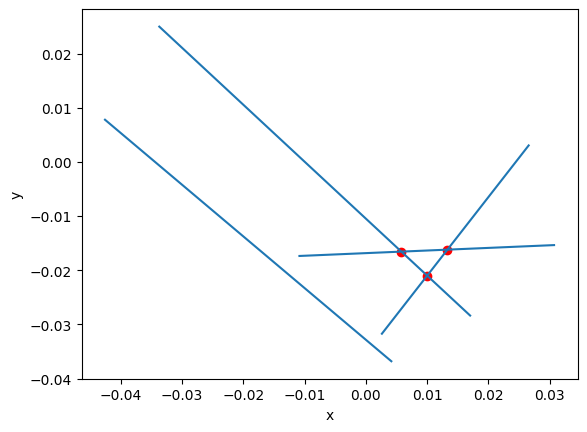

In [37]:
draw_intersections(find_intersections(Test.read_points(3,2)),Test.read_points(3,2))

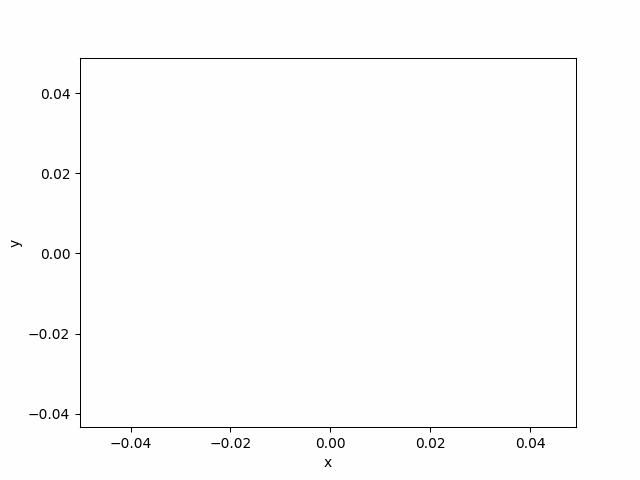

In [38]:
_,vis=find_intersections_with_visualization(Test.read_points(3,3))
vis.show_gif()

[(0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001), (-0.0019072594181183955, 0.030224161896051163), (0.02781048251736548, -0.0065099067313998255), (-0.0065645174826345215, 0.002589357974482537), (0.027588708323817088, -0.011228043986301783), (-0.003903227160053882, -0.0294265733980665), (0.028697579291559028, -0.020664318496105713), (-0.024306452966505486, -0.0122390733980665), (0.002971772839946124, -0.017631230260811592), (-0.020536291676182906, 0.0234839658176198), (0.002528224452849351, 0.010340583464678615), (-0.0327338723213442, -0.02875255379022336), (0.0009758050980106375, -0.03818882830002729), (-0.04271371103102162, -0.003813828300027272), (-0.018096775547150654, -0.00010672045689001652), (-0.04559677554715065, 0.036290338366639405), (-0.024306452966505486, 0.011688622680364885), (0.02226612767865581, -0.03919985771179199), (0.044665321227042906, -0.01965328908434101)]


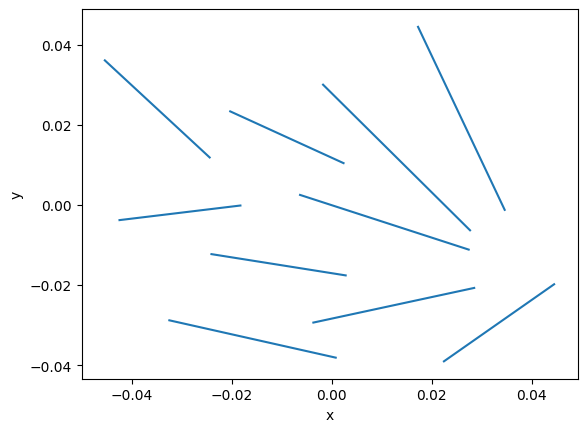

In [39]:
draw_intersections(find_intersections(Test.read_points(3,3)),Test.read_points(3,3))

[(21.370967741935484, 83.92857142857144), (13.508064516129032, 37.3917748917749), (30.040322580645157, 59.84848484848486), (42.13709677419355, 19.805194805194812), (46.77419354838709, 55.519480519480524), (29.83870967741935, 24.40476190476191), (54.63709677419355, 73.64718614718616), (71.77419354838709, 34.14502164502166), (52.016129032258064, 34.686147186147195), (78.4274193548387, 59.57792207792208), (11.491935483870964, 66.61255411255412), (87.5, 37.3917748917749)]


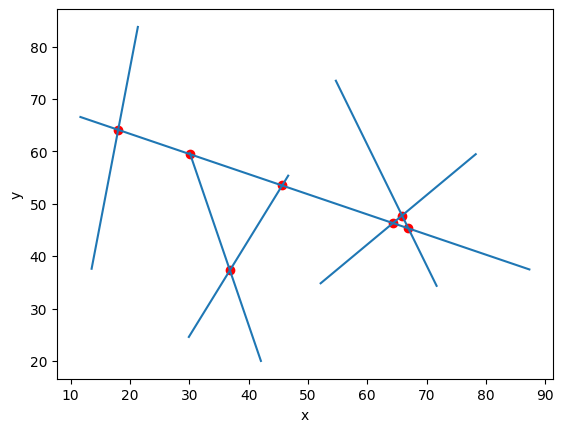

In [43]:
for segment in test_segments:
    draw_intersections(find_intersections(segment),segment)

In [51]:
big_sets=[generate_uniform_sections(100,100,20) for _ in range(4)]

[(44.21791451094897, 27.685742640369092), (67.32474961555425, 53.08020257002505), (38.4504701473762, 19.5899045599928), (55.862463807272825, 68.70287547357972), (22.926353217214658, 7.428513350557098), (68.04192500458416, 93.00797037445618), (66.3138411044213, 23.92213073158428), (67.01970479426808, 19.542817264818623), (69.83908834551022, 57.53629143558968), (89.83205447520378, 22.097192606239947), (12.0773869588654, 1.5654030212865822), (31.874438742547074, 6.907487862121641), (53.59792087134744, 52.009089674164855), (73.03698212324119, 81.35989090081529), (54.76383255496605, 32.68637183720903), (82.98480063302641, 45.295425450228585), (21.327950830898214, 79.12832523386379), (78.97463599995194, 51.67272946921378), (2.673556409814848, 9.100858574959748), (9.832188992070467, 14.84528724281965), (86.21115401535029, 86.9946427170168), (97.61374443354428, 76.11979651929512), (24.0381334131214, 24.857913620438055), (40.140824362748475, 74.5183149346981), (53.37950669651427, 4.359148071536

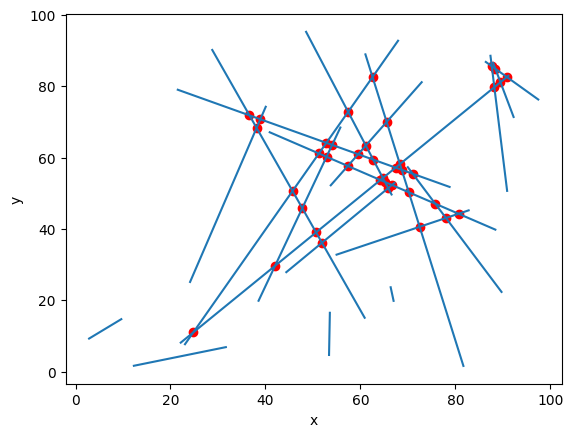

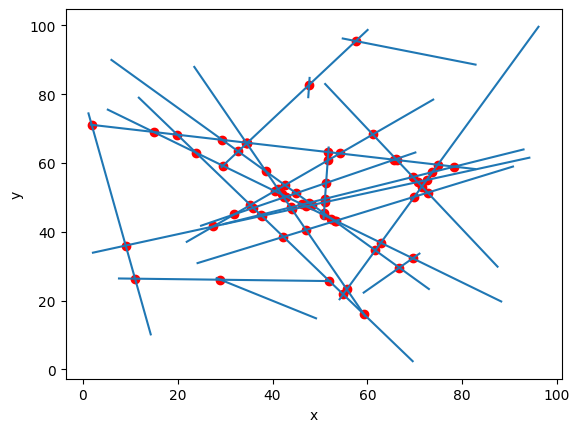

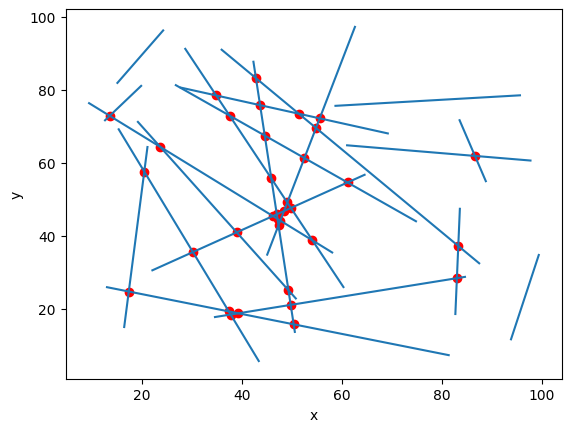

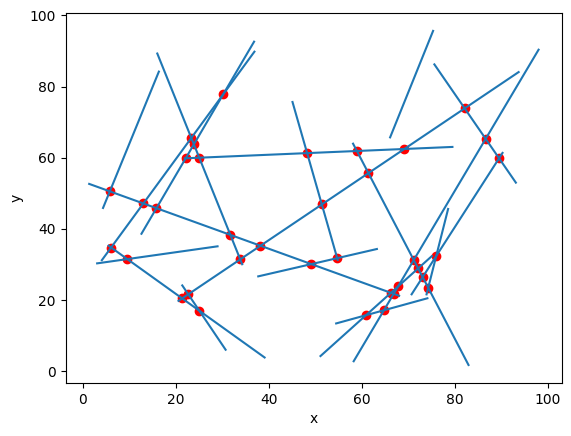

In [52]:
for s in big_sets:
    draw_intersections(find_intersections(s),s)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [40]:
# testing_sections = ???

In [41]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.

In [54]:
dill.dump_session('notebook_env.db')